# 책보고 연습하는 노트북

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/bike-sharing-demand/train.csv', parse_dates=True)
test = pd.read_csv('/kaggle/input/bike-sharing-demand/test.csv')
submission = pd.read_csv('/kaggle/input/bike-sharing-demand/sampleSubmission.csv')

In [3]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 n

(None, None)

In [7]:
print(train['datetime'][0])
print(train['datetime'][0].split())
print(train['datetime'][0].split()[0])
print(train['datetime'][0].split()[0].split('-'))
print(train['datetime'][0].split()[0].split('-')[0])

2011-01-01 00:00:00
['2011-01-01', '00:00:00']
2011-01-01
['2011', '01', '01']
2011


In [8]:
# datetime 에서 date 만 분리해서 연, 월, 일로 새 column 만들기
train['date'] = train['datetime'].apply(lambda x: x.split()[0])
train['year'] = train['date'].apply(lambda x: x.split('-')[0])
train['month'] = train['date'].apply(lambda x: x.split('-')[1])
train['day'] = train['date'].apply(lambda x: x.split('-')[2])

# datetime 에서 time만 분리 시, 분, 초 로 분리해서 column 만들기
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])

In [9]:
from datetime import datetime
import calendar

print(train['date'][0])
print(datetime.strptime(train['date'][0], '%Y-%m-%d').weekday())
print(calendar.day_abbr[datetime.strptime(train['date'][0], '%Y-%m-%d').weekday()])

2011-01-01
5
Sat


In [10]:
calendar.day_abbr[datetime.strptime(train['date'][1000], '%Y-%m-%d').weekday()]

'Sun'

In [11]:
train['weekday'] = train['date'].apply(lambda x: 
            calendar.day_abbr[datetime.strptime(x, '%Y-%m-%d').weekday()])

In [12]:
train['season'] = train['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
train['weather'] = train['weather'].map({1: 'Clear', 2: 'Mist, Few clouds',
                        3: 'Light Snow, Rain, Thunder', 4: ' Heavy Snow, Rain, Thunder'})

In [13]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,00,00,Sat
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,00,00,Sat
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,00,00,Sat
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,00,00,Sat
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,00,00,Sat


# 시각화

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

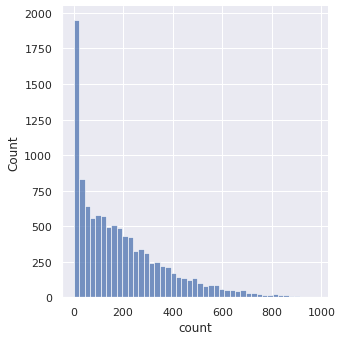

In [15]:
# 분포도
mpl.rc('font', size=15)
sns.displot(train['count']);

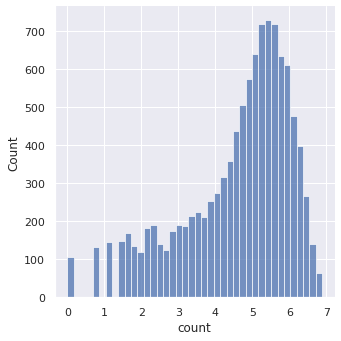

In [16]:
sns.displot(np.log(train['count']));

Bar plot

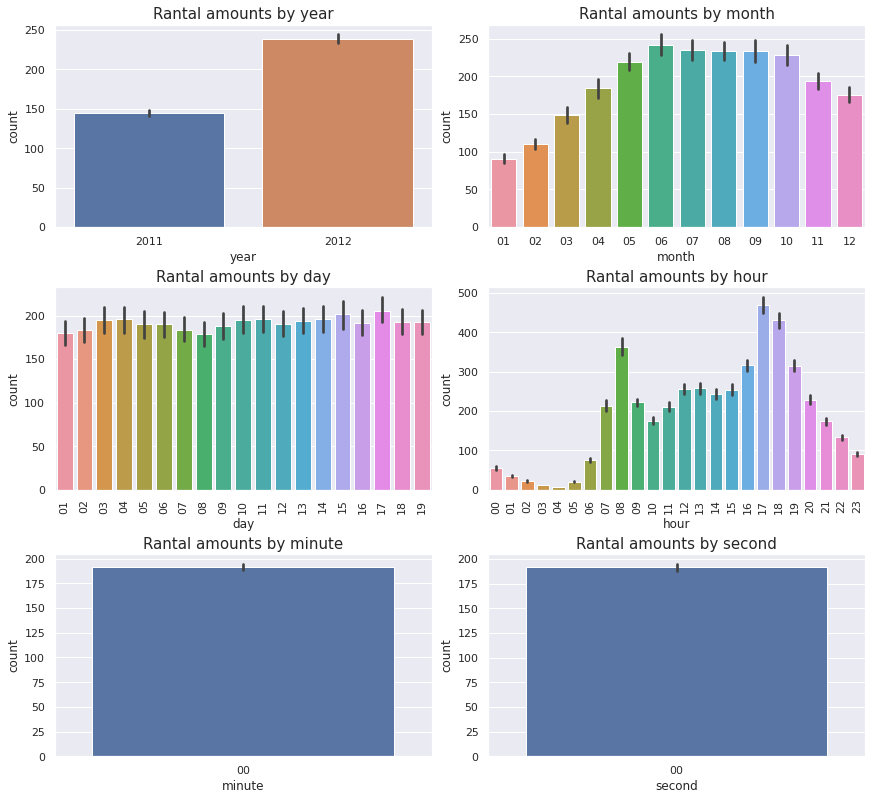

In [17]:
mpl.rc('font', size=14)        # 폰트 크기 설정
mpl.rc('axes', titlesize=15)   # 각 축의 제목 크기 설정
fig, axes = plt.subplots(3, 2, constrained_layout=True) # figsize=(12, 12) 타이틀이 겹친다.
# plt.tight_layout()
fig.set_size_inches(12,11)

# 각 축에 연도, 월, 일, 시간, 분, 초별 평균 대여 수량 막대 그래프 할당
sns.barplot(x='year', y='count', data=train, ax=axes[0, 0])
sns.barplot(x='month', y='count', data=train, ax=axes[0, 1])
sns.barplot(x='day', y='count', data=train, ax=axes[1, 0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1, 1])
sns.barplot(x='minute', y='count', data=train, ax=axes[2, 0])
sns.barplot(x='second', y='count', data=train, ax=axes[2, 1])

axes[0, 0].set(title='Rantal amounts by year')
axes[0, 1].set(title='Rantal amounts by month')
axes[1, 0].set(title='Rantal amounts by day')
axes[1, 1].set(title='Rantal amounts by hour')
axes[2, 0].set(title='Rantal amounts by minute')
axes[2, 1].set(title='Rantal amounts by second')

axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

박스 플롯

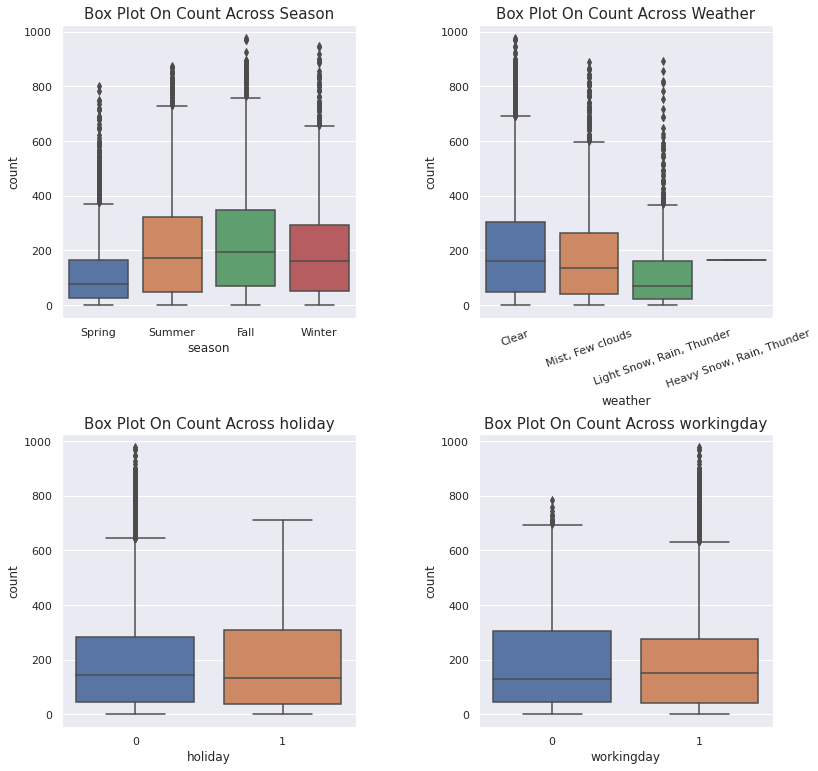

In [18]:
fig, axes = plt.subplots(2, 2)
plt.tight_layout()
fig.set_size_inches(12, 12)

# 계절, 날씨, 공휴일, 근무일별 대여 수량 박스플롯
sns.boxplot(x='season', y='count', data=train, ax=axes[0, 0])
sns.boxplot(x='weather', y='count', data=train, ax=axes[0, 1])
sns.boxplot(x='holiday', y='count', data=train, ax=axes[1, 0])
sns.boxplot(x='workingday', y='count', data=train, ax=axes[1, 1])

axes[0, 0].set_title('Box Plot On Count Across Season')
axes[0, 1].set_title('Box Plot On Count Across Weather')
axes[1, 0].set_title('Box Plot On Count Across holiday')
axes[1, 1].set_title('Box Plot On Count Across workingday')

axes[0, 1].tick_params('x', labelrotation=20)

point plot

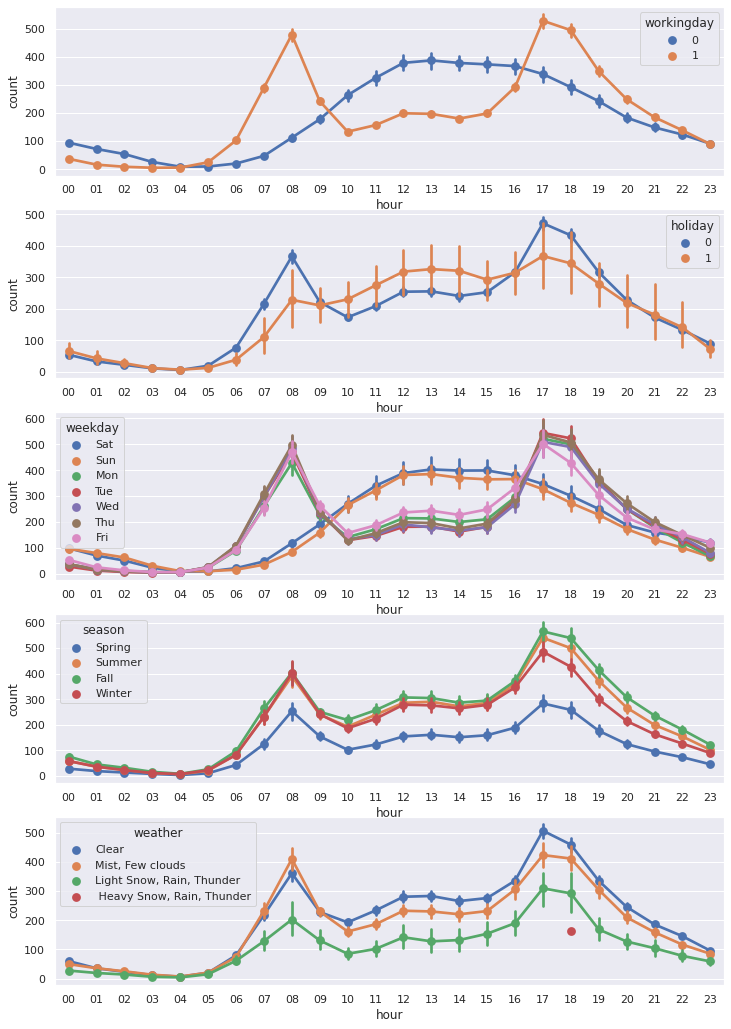

In [19]:
fig, axes = plt.subplots(5)
fig.set_size_inches(12, 18)

# 근무일, 공휴일, 요일, 계절, 날씨에 따른 시간대별 평균 대여 수량 포인트플롯
sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=axes[2])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[3])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[4]);

회귀선을 포함한 산점도 그래프

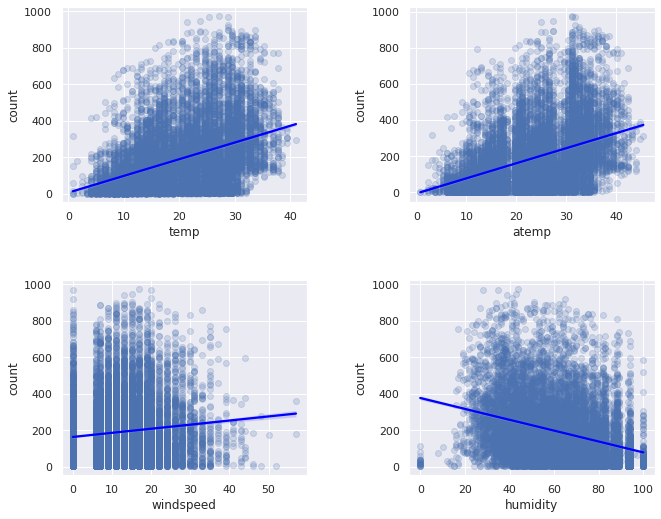

In [20]:
fig, axes = plt.subplots(2, 2)
plt.tight_layout()
fig.set_size_inches(10,8)

# 온도, 체감 온도, 풍속, 습도 별 대여 수량 산점도 그래프
sns.regplot(x='temp', y='count', data=train, ax=axes[0, 0],
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='atemp', y='count', data=train, ax=axes[0, 1],
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='windspeed', y='count', data=train, ax=axes[1, 0],
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='humidity', y='count', data=train, ax=axes[1, 1],
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'});

Heat Map

In [21]:
# 상관관계 구하기
train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


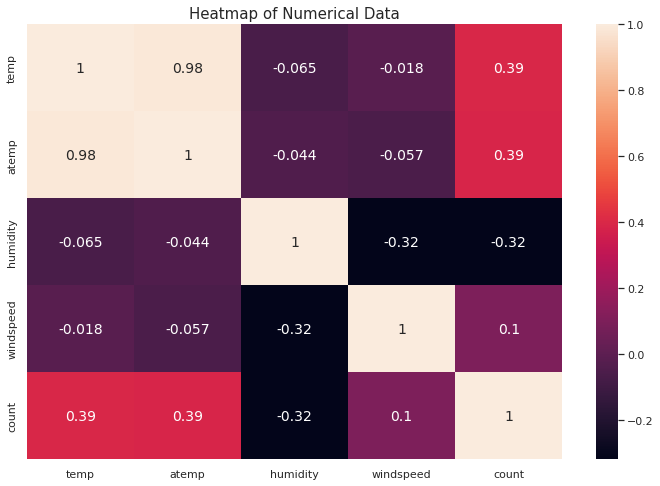

In [22]:
corrMat = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.heatmap(corrMat, annot=True)
plt.title('Heatmap of Numerical Data');

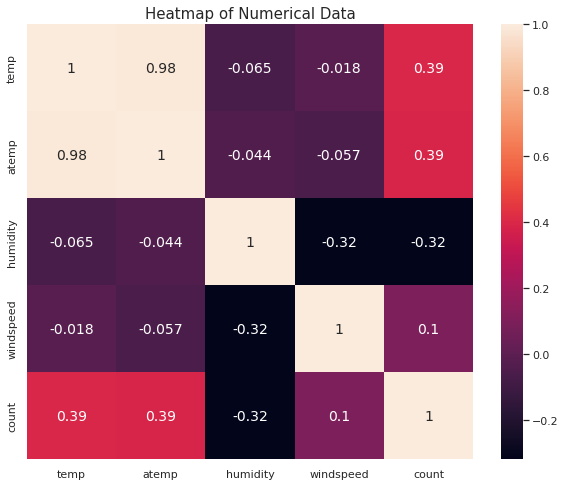

In [23]:
corrMat = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrMat, annot=True)
plt.title('Heatmap of Numerical Data');

In [24]:
mpl.figure.Figure.set_size
plt.subplots()

AttributeError: type object 'Figure' has no attribute 'set_size'